In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
features_to_remove = ['id', 'date']
df.drop(features_to_remove, axis=1, inplace=True)

In [2]:
df['bedrooms'].mean()

NameError: name 'df' is not defined

In [4]:
df.dtypes


price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
feature_list = df.columns[1:]
feature_list

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
X = df[feature_list]
y = df[ 'price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
numeric_features = df.columns[1:]
numeric_transformer = StandardScaler()
feature_encoder = ColumnTransformer(
    transformers=[
        #('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )
X_train = feature_encoder.fit_transform(X_train)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
y_train_pred = regressor.predict(X_train)

In [11]:
X_test = feature_encoder.transform(X_test)

In [12]:
y_test_pred = regressor.predict(X_test)

In [13]:
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

R2 score on training set :  0.7005349311144583
R2 score on test set :  0.6949310095117935


In [14]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

coefficients are:  [-32701.47000307  30449.68804324  83933.85972916   7434.65151591
   4028.47319343  54465.3397212   40664.6372095   17013.67531022
 110098.90328086  78597.54123361  27290.74151395 -76870.33373561
   8211.11839114 -30361.9132527   83846.75327686 -31299.76217735
  16629.80716163 -12979.28018609]
Constant is:  542799.837767491


In [15]:

print("All transformers are: ", feature_encoder.transformers_)
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

All transformers are:  [('num', StandardScaler(), Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object'))]
One Hot Encoder transformer is:  StandardScaler()


In [16]:
numerical_column_names = X.loc[:, numeric_features].columns.tolist() # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [17]:
feature_importance = pd.DataFrame({
    "feature_names": numerical_column_names,
    "coefficients":regressor.coef_
})

feature_importance

,feature_names,coefficients
0,bedrooms,-32701.470003
1,bathrooms,30449.688043
2,sqft_living,83933.859729
3,sqft_lot,7434.651516
4,floors,4028.473193
5,waterfront,54465.339721
6,view,40664.637210
7,condition,17013.675310
8,grade,110098.903281
9,sqft_above,78597.541234


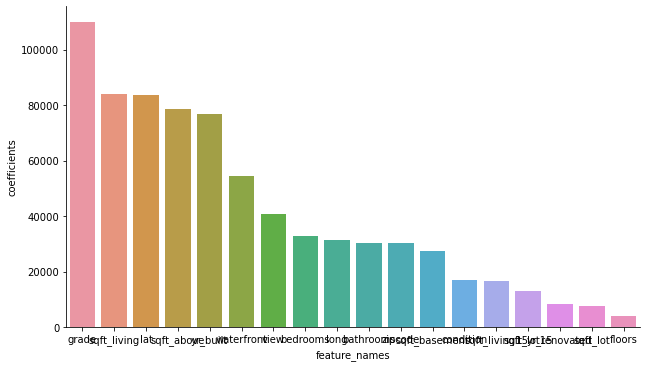

In [18]:
feature_importance["coefficients"] = feature_importance["coefficients"].abs()
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9)

In [19]:
from sklearn.ensemble import RandomForestRegressor


In [20]:
rfc = RandomForestRegressor()

In [21]:
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_train_pred = rfc.predict(X_train)

In [23]:
y_test_pred = rfc.predict(X_test)

In [24]:
print("R2 score on training set : ", rfc.score(X_train, y_train))
print("R2 score on test set : ", rfc.score(X_test, y_test))

R2 score on training set :  0.9822476897518605
R2 score on test set :  0.8929084750760695


In [261]:
rfc2 = RandomForestRegressor(n_estimators=40, max_depth=5)

In [262]:
rfc2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=40)

In [263]:
y_train_pred = rfc2.predict(X_train)


In [264]:
y_test_pred = rfc2.predict(X_test)

In [265]:
print("R2 score on training set : ", rfc2.score(X_train, y_train))
print("R2 score on test set : ", rfc2.score(X_test, y_test))

R2 score on training set :  0.8123427163393526
R2 score on test set :  0.7856278360297253
